In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
C = 30          # пиковая пропускная способность соты
lambda_1 = 30    # интенсивность поступления запросов на предоставление услуги 1-го типа
#lambda_1_finish = 40 
lambda_2 = 25   # интенсивность поступления запросов на предоставление услуги 2-го типа
#lambda_2_finish = 30
teta_1 = 1.2   # длина передаваемого файла 1-го типа
teta_2 = 1.2   # длина передаваемого файла 2-го типа

In [3]:
def stat_dist (C, lambda_1, lambda_2, teta_1, teta_2):   # стационарное распределение вероятностей состояний системы
    
    p = []
    p_0 = 0
    p_n = 0
    
    ro_1 = lambda_1*teta_1
    ro_2 = lambda_2*teta_2

    a_1=ro_1/C
    a_2=ro_2/C
    
    for i in range(0,C+1):
        for j in range(0,C+1):
            p_0 += (np.math.factorial(i+j)) * ((np.power(a_1,i)/np.math.factorial(i)) * (np.power(a_2,j))/np.math.factorial(j))
    
    p_0 = 1/p_0
    p.append(p_0)
    
    for i in range(0,C+1):
        for j in range(0,C+1):
            if (i==0) and (j==0):
                continue
            else:
                p_n = (p_0 * (np.math.factorial(i+j))) * ((np.power(a_1,i)/np.math.factorial(i)) * ((np.power(a_2,j))/np.math.factorial(j)))
                p.append(p_n)
    return p

Стационарное распределение вероятностей состояний системы:

In [4]:
count = 0
for result in stat_dist(C, lambda_1, lambda_2, teta_1, teta_2):
    print(result)
    count +=1

1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994314e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994314e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994317e-20
1.0525482417994315e-20
1.0525482417994314e-20
1.0525482417994314e-20
1.0525482417994317e-20
1.0525482417994314e-20
1.0525482417994315e-20
1.0525482417994315e-20
1.0525482417994317e-20
1.0525482417994315e-20
1.2630578901593178e-20
2.5261157803186356e-20
3.7891736704779534e-20
5.052231560637271e-20
6.315289450796588e-20
7.578347340955907e-20
8.841405231115226e-20
1.0104463121274544e-19
1.136752101143386e-19
1.263057890159318e-19
1.3893636791752494e-19
1.5156694681911813e-19
1.641975257207113

In [5]:
count

961

In [6]:
def avg_req(C, lambda_1, lambda_2, teta_1, teta_2):
    
    n_1 = lambda_1*(teta_1/(teta_1*lambda_1+teta_2*lambda_2))
    n_2 = lambda_2*(teta_2/(teta_1*lambda_1+teta_2*lambda_2))
    
    return n_1,n_2

In [7]:
print("Среднее число запросов на передачу данных: "\
      +str(avg_req(C, lambda_1, lambda_2, teta_1, teta_2)))

Среднее число запросов на передачу данных: (0.5454545454545454, 0.45454545454545453)


In [8]:
def avg_time(C, lambda_1, lambda_2, teta_1, teta_2):
    
    n = avg_req(C, lambda_1, lambda_2, teta_1, teta_2)
    
    t_1 = 0
    t_2 = 0
    
    if lambda_1>0:
        t_1 = n[0]/lambda_1
    
    if lambda_2>0:
        t_2 = n[1]/lambda_2
        
    return t_1, t_2

In [9]:
print("Среднее время обслуживания запросов на передачу данных: "\
      +str(avg_time(C, lambda_1, lambda_2, teta_1, teta_2)))

Среднее время обслуживания запросов на передачу данных: (0.01818181818181818, 0.01818181818181818)


In [10]:
acc = 0.1
num = int(C/acc)

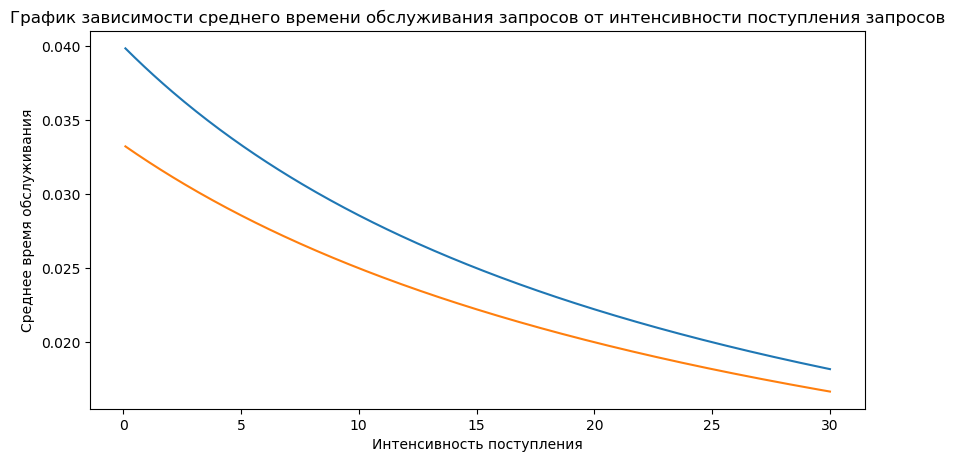

In [11]:
avg_time_list_1 = []
avg_time_list_2 = []

for i in np.linspace(0.1,max(lambda_1,lambda_2),num):
    avg_time_list_1.append(avg_time(C, i, lambda_2, teta_1, teta_2)[0])
for j in np.linspace(0.1,max(lambda_1,lambda_2),num):
    avg_time_list_2.append(avg_time(C, lambda_1, j, teta_1, teta_2)[1])
plt.figure(figsize=(10,5), dpi=100)
plt.plot(np.linspace(0.1,max(lambda_1,lambda_2),num), avg_time_list_1)
plt.plot(np.linspace(0.1,max(lambda_1,lambda_2),num), avg_time_list_2)


plt.title('График зависимости среднего времени обслуживания запросов от интенсивности поступления запросов')
plt.xlabel('Интенсивность поступления')
plt.ylabel('Среднее время обслуживания')
plt.show()

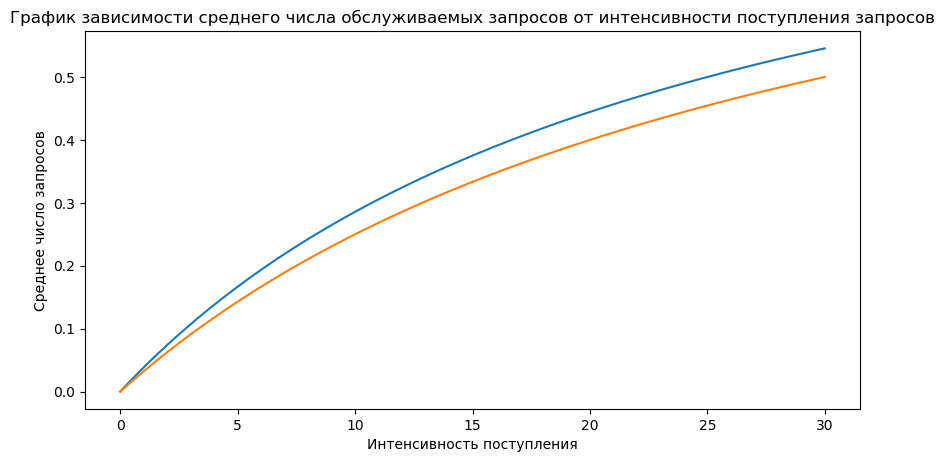

In [12]:
avg_req_list_1 = []
avg_req_list_2 = []

for i in np.linspace(0,max(lambda_1,lambda_2),num):
    avg_req_list_1.append(avg_req(C, i, lambda_2, teta_1, teta_2)[0])
plt.figure(figsize=(10,5), dpi=100)
plt.plot(np.linspace(0,max(lambda_1,lambda_2),num), avg_req_list_1)

for j in np.linspace(0,max(lambda_1,lambda_2),num):
    avg_req_list_2.append(avg_req(C, lambda_1, j, teta_1, teta_2)[1])
plt.plot(np.linspace(0,max(lambda_1,lambda_2),num), avg_req_list_2)

plt.title('График зависимости среднего числа обслуживаемых запросов от интенсивности поступления запросов')
plt.xlabel('Интенсивность поступления')
plt.ylabel('Среднее число запросов')
plt.show()